# Stock Prices Prediction - Team 20

## Importing Libraries

In [319]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import style
import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import math
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

from scipy import stats
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta

from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense,Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model
import os
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras.layers import LSTM , GRU
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model

K.clear_session()


## Extracting Data 

In [320]:
homeDir="/Users/namrataruchandani/Downloads/data_set/stocks/"
for dirname, _, filenames in os.walk('/Users/namrataruchandani/Downloads/data_set/stocks'):
    myArr =[]    
    for filename in filenames: 
        myArr.append(filename)


### Choose the company for stock price prediction from below

In [321]:
print(myArr)

['RIV.csv', 'ANTE.csv', 'CSCO.csv', 'PRI.csv', 'NZF.csv', 'HLNE.csv', 'UNT.csv', 'HUBS.csv', 'GPL.csv', 'SBGI.csv', 'UFCS.csv', 'TEAF.csv', 'RJZ.csv', 'GFED.csv', 'AIRT.csv', 'SITC.csv', 'NXN.csv', 'BNY.csv', 'RHE.csv', 'ISSC.csv', 'KNDI.csv', 'EFT.csv', 'TRNS.csv', 'CARO.csv', 'NTZ.csv', 'AEIS.csv', 'UAL.csv', 'TROW.csv', 'ISRG.csv', 'EGP.csv', 'EFC.csv', 'EEX.csv', 'NVR.csv', 'PLYM.csv', 'TELA.csv', 'FEIM.csv', 'WOR.csv', 'TLRY.csv', 'PRGO.csv', 'LECO.csv', 'ALTG.csv', 'RPT.csv', 'VCYT.csv', 'USAC.csv', 'COHN.csv', 'NBW.csv', 'PLOW.csv', 'PIC.csv', 'PRGX.csv', 'ERF.csv', 'IFN.csv', 'FIHD.csv', 'PHG.csv', 'UVE.csv', 'BUD.csv', 'ORRF.csv', 'NTRSO.csv', 'PFL.csv', 'PDS.csv', 'OESX.csv', 'BLDP.csv', 'SIBN.csv', 'NOG.csv', 'BXC.csv', 'CHAP.csv', 'CHNGU.csv', 'KSM.csv', 'XCUR.csv', 'PDD.csv', 'CHCO.csv', 'BBIO.csv', 'LBTYK.csv', 'IMAB.csv', 'SPOK.csv', 'SPLP.csv', 'TPR.csv', 'TSI.csv', 'DVN.csv', 'SACC.csv', 'MGEE.csv', 'MNCLU.csv', 'AMSC.csv', 'SVT.csv', 'STK.csv', 'XLRN.csv', 'SWP.csv', 

In [322]:
name=input()
df = pd.read_csv(homeDir + name + '.csv',na_values=['null'])
# df = df.sort_values('Date')
print(df.head())
df.tail()
df_lr=df.copy()
df_arima=df.copy()
df_lstm=df.copy()


AAPL
         Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.513393  0.515625  0.513393  0.513393   0.406782  117258400
1  1980-12-15  0.488839  0.488839  0.486607  0.486607   0.385558   43971200
2  1980-12-16  0.453125  0.453125  0.450893  0.450893   0.357260   26432000
3  1980-12-17  0.462054  0.464286  0.462054  0.462054   0.366103   21610400
4  1980-12-18  0.475446  0.477679  0.475446  0.475446   0.376715   18362400


In [323]:
# df_arima=df.copy()
# df_arima1=df.copy()
# df_arima = df_arima.groupby('Date')['Close'].sum().reset_index()
# df_arima.head()

In [324]:
df.set_index('Date', inplace=True)

In [325]:
print(df.head())
print()
print(df.info())
print()
print(df.shape)

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
1980-12-12  0.513393  0.515625  0.513393  0.513393   0.406782  117258400
1980-12-15  0.488839  0.488839  0.486607  0.486607   0.385558   43971200
1980-12-16  0.453125  0.453125  0.450893  0.450893   0.357260   26432000
1980-12-17  0.462054  0.464286  0.462054  0.462054   0.366103   21610400
1980-12-18  0.475446  0.477679  0.475446  0.475446   0.376715   18362400

<class 'pandas.core.frame.DataFrame'>
Index: 9909 entries, 1980-12-12 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       9909 non-null   float64
 1   High       9909 non-null   float64
 2   Low        9909 non-null   float64
 3   Close      9909 non-null   float64
 4   Adj Close  9909 non-null   float64
 5   Volume     9909 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 541.9+ KB

In [326]:
 df=df.dropna()

In [327]:
df.isnull().values.any()


False

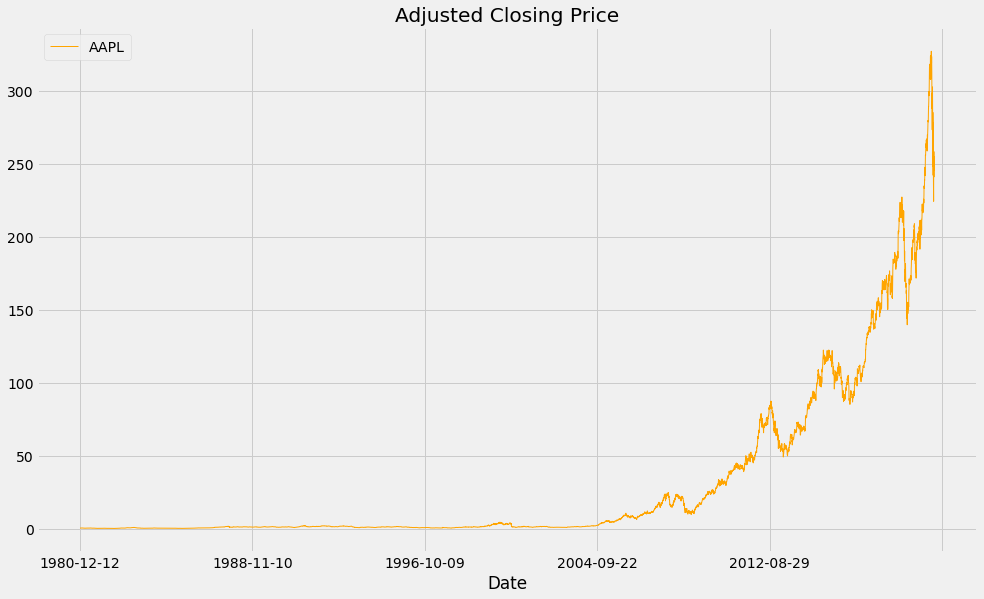

In [328]:
df['Adj Close'].plot(label=name, figsize=(15, 9), title='Adjusted Closing Price', color='orange', linewidth=1.0, grid=True)
plt.legend()


## Correlation with Adjusted Close

In [329]:
X=df.drop(['Adj Close'],axis=1)
X=X.drop(['Close'],axis=1)

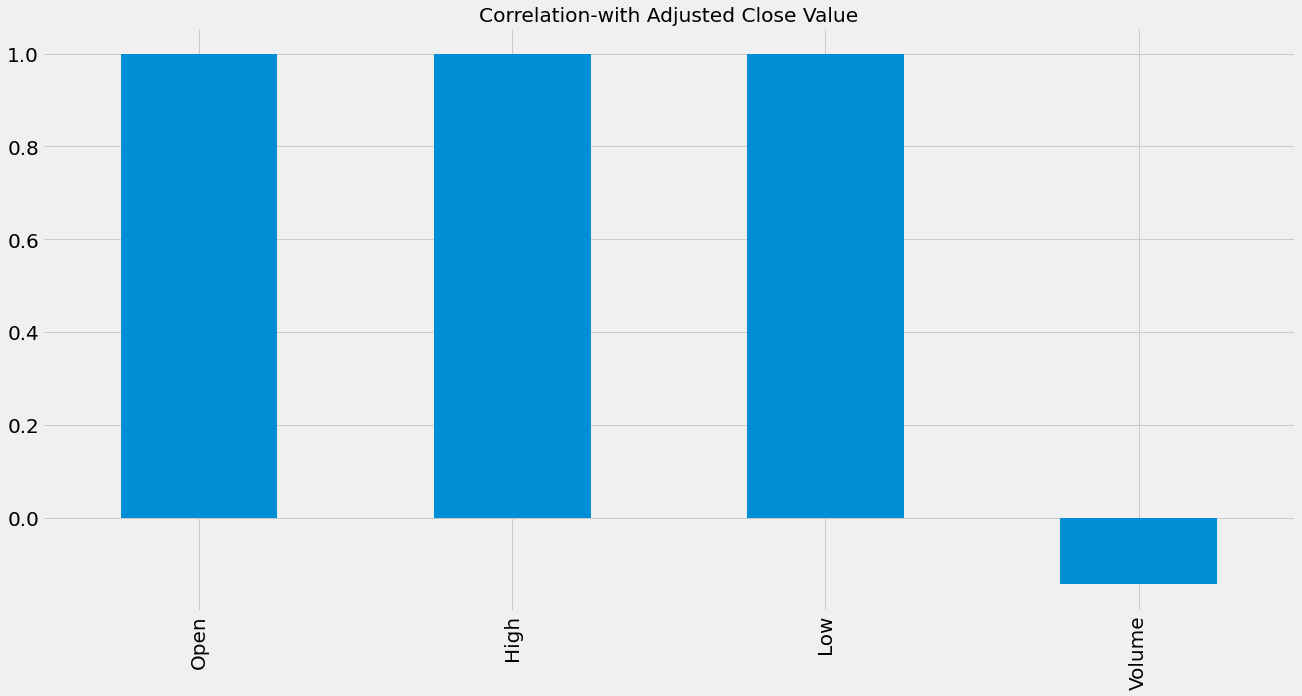

In [330]:
X.corrwith(df['Adj Close']).plot.bar(
        figsize = (20, 10), title = "Correlation-with Adjusted Close Value", fontsize = 20,
        rot = 90, grid = True)

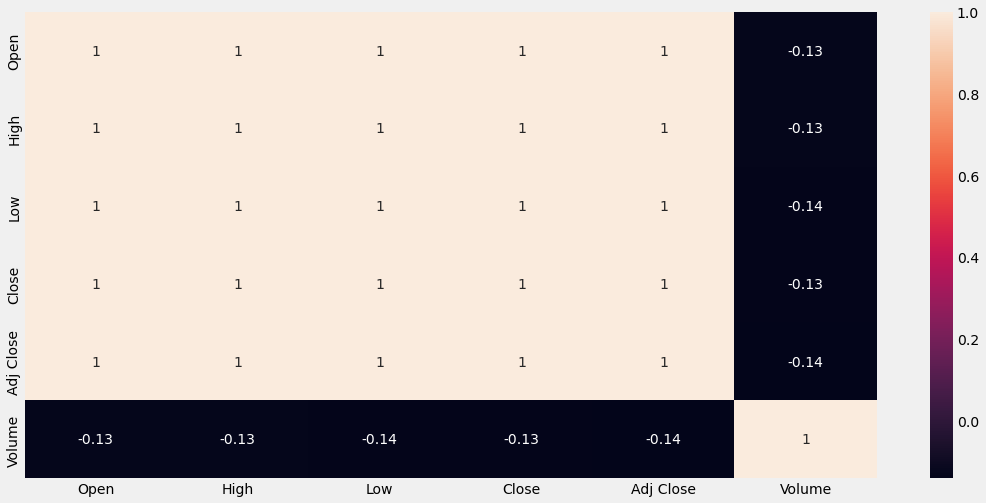

In [331]:
import seaborn as sns
plt.figure(1 , figsize = (17 , 8))
corelation = sns.heatmap(df.corr(), annot = True)

### Return Deviation for determining risk and return

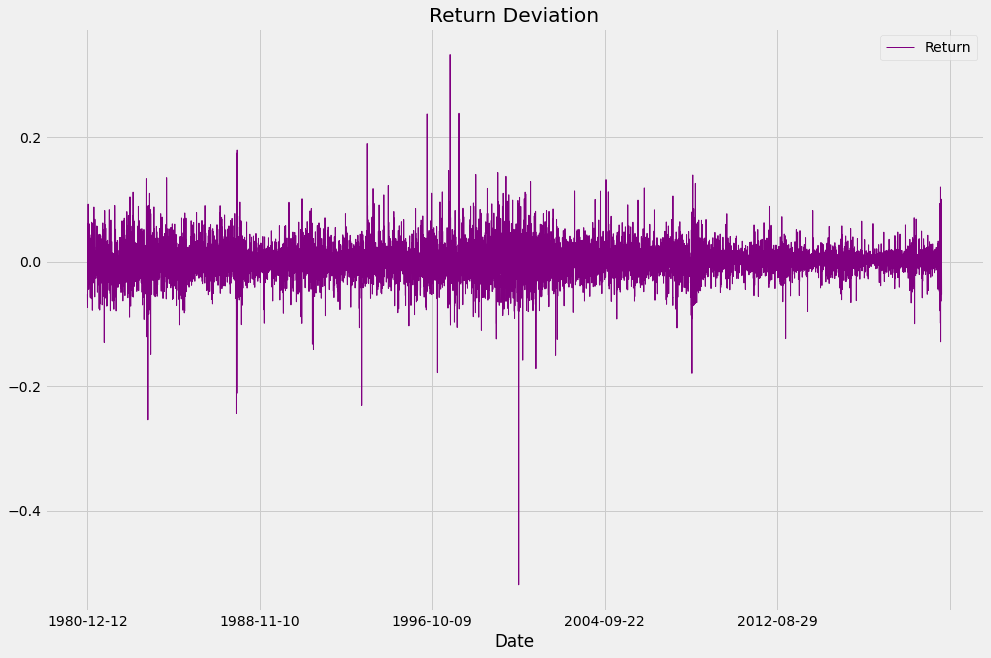

In [332]:
CloseColumn = df['Adj Close']
ReturnDeviation = CloseColumn / CloseColumn.shift(1) - 1
ReturnDeviation.plot(label='Return', figsize=(15, 10), title='Return Deviation', color='purple', linewidth=1.0, grid=True)
plt.legend()

# 1. Linear Regression

## Data Preprocessing 

In [333]:
# Number of days for which to predict the stock prices
PredictDays = 45
df_lr=df.copy()


In [334]:
df_lr['Prediction'] =df_lr['Adj Close'].shift(-PredictDays)
print(df_lr['Prediction'])
print(df_lr['Adj Close'])

Date
1980-12-12    0.385558
1980-12-15    0.362566
1980-12-16    0.343111
1980-12-17    0.348417
1980-12-18    0.336037
                ...   
2020-03-26         NaN
2020-03-27         NaN
2020-03-30         NaN
2020-03-31         NaN
2020-04-01         NaN
Name: Prediction, Length: 9909, dtype: float64
Date
1980-12-12      0.406782
1980-12-15      0.385558
1980-12-16      0.357260
1980-12-17      0.366103
1980-12-18      0.376715
                 ...    
2020-03-26    258.440002
2020-03-27    247.740005
2020-03-30    254.809998
2020-03-31    254.289993
2020-04-01    240.910004
Name: Adj Close, Length: 9909, dtype: float64


In [335]:
X = np.array(df_lr.drop(['Prediction'], axis = 1))
X = X[:-PredictDays]     
print(X.shape)

y = np.array(df_lr['Prediction'])
y = y[:-PredictDays]      
print(y.shape)


(9864, 6)
(9864,)


### Splitting the data into 80% for training & 20% for testing

In [336]:
# Splitting the data into 80% for training & 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)     
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7891, 6)
(7891,)
(1973, 6)
(1973,)


##  Linear Regression Modelling 

In [337]:
LinearModel = LinearRegression()
LinearModel.fit(X_train, y_train)  

LinearRegression()

In [338]:
TLMS = LinearModel.score(X_train, y_train)
print('Train Linear Model score:', TLMS)

Train Linear Model score: 0.980451151812293


In [339]:
LMS = LinearModel.score(X_test, y_test)
print('Test Linear Model score:', LMS)

Test Linear Model score: 0.9776373000649654


In [340]:
X_predict = np.array(df_lr.drop(['Prediction'], 1))[-PredictDays:]

LinearModel_prediction = LinearModel.predict(X_predict)
LinearModel_realprediction = LinearModel.predict(np.array(df_lr.drop(['Prediction'], 1)))


In [341]:
Predicted_Dates = []
RecentDate = df_lr.index.max()
display_at = 800
alpha = 0.25

for i in range(PredictDays):
    RecentDate += str(timedelta(days=1))
    Predicted_Dates.append(RecentDate)


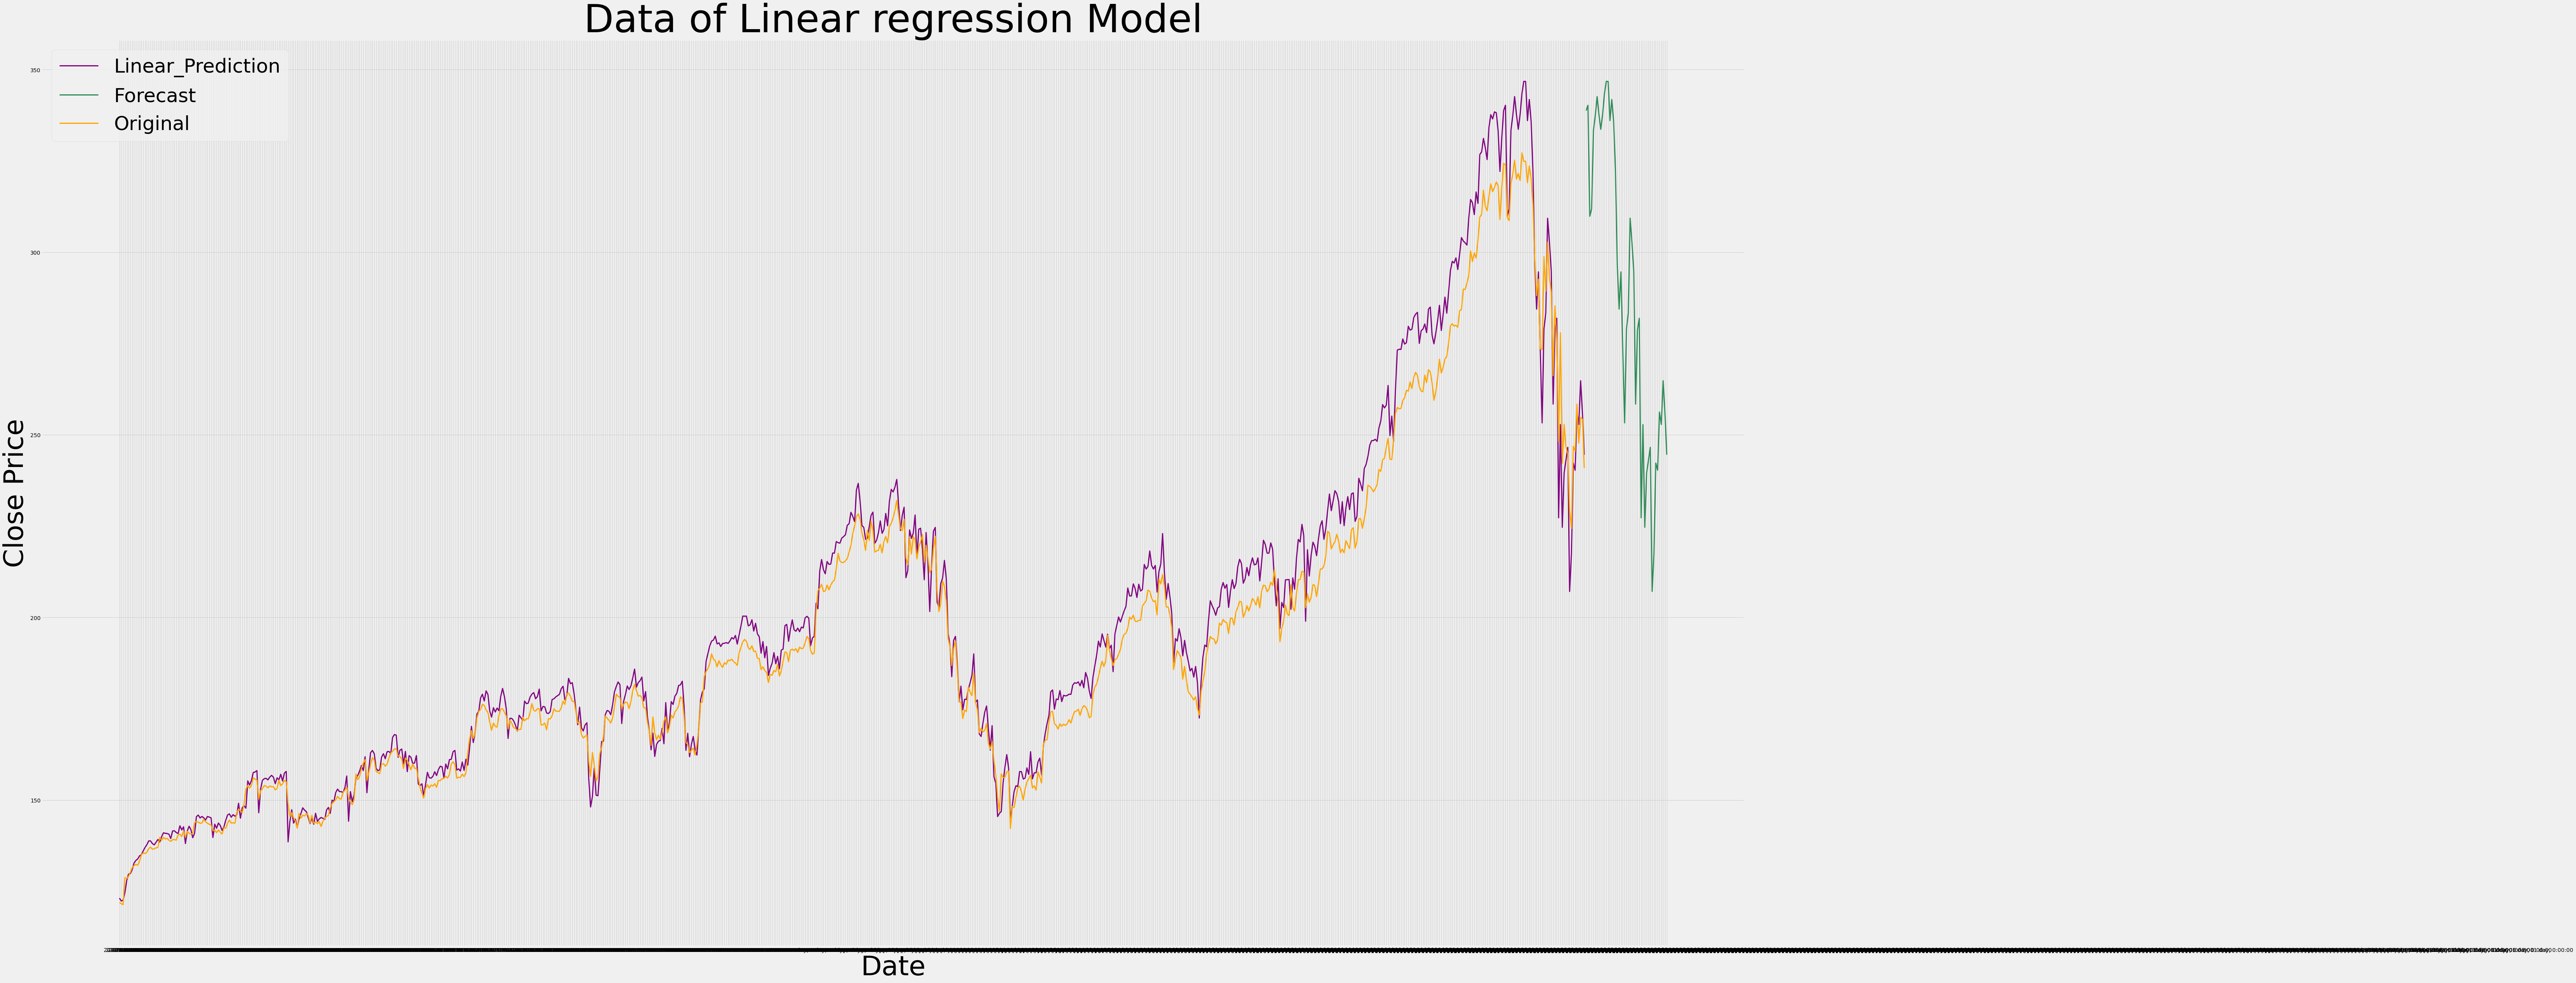

In [342]:
plt.figure(figsize=(70,40))
plt.title('Data of Linear regression Model',fontsize=100)
plt.xlabel('Date', fontsize=70)
plt.ylabel('Close Price', fontsize=70)

plt.plot(df_lr.index[-display_at:], LinearModel_realprediction[-display_at:], label='Linear_Prediction',linewidth = 3, color='purple')

plt.plot(Predicted_Dates, LinearModel_prediction, label='Forecast',linewidth = 3, color='seagreen')

plt.plot(df_lr.index[-display_at:], df_lr['Close'][-display_at:], label='Original',linewidth = 3, color='orange')

plt.legend(loc ="upper left", fontsize=50)
plt.show()

In [343]:
mse = mean_squared_error(LinearModel_realprediction,df_lr['Close'])

rmse = math.sqrt(mse)

print("The root mean square of linear regression is",rmse)

The root mean square of linear regression is 3.6385324102770453


# 2. Auto Regressive Integrated Moving Average (ARIMA)

## Data preprocessing

In [344]:
#defining function to perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
def adf_test(df_timeseries):
    #ADF test:
    print ('Results of ADF Test:')
    df_test = adfuller(df_timeseries, autolag='AIC')
    df_output = pd.Series(df_test[0:4], index=['Statistic Test','p_Value','Number of Lags Used','#Observations Used'])
    for key,value in df_test[4].items():
       df_output['Critical Value (%s)'%key] = value
    print (df_output)

#apply adf test on the series
adf_test(df_arima['Close'])

Results of ADF Test:
Statistic Test             1.893974
p_Value                    0.998518
Number of Lags Used       37.000000
#Observations Used      9871.000000
Critical Value (1%)       -3.431013
Critical Value (5%)       -2.861833
Critical Value (10%)      -2.566926
dtype: float64


In [346]:
#defining function to perform Kwiatkowski-Phillips-Schmidt-Shin test
from statsmodels.tsa.stattools import kpss
def kpss_test(df_timeseries):
    print ('Results of KPSS Test:')
    KPSS_Test1 = kpss(df_timeseries, regression='c')
    KPSS_Output = pd.Series(KPSS_Test1[0:3], index=['Statistic Test','p_Value','Number of Lags Used'])
    for key,value in KPSS_Test1[3].items():
        KPSS_Output['Critical Value (%s)'%key] = value
    print (KPSS_Output)
kpss_test(df_arima['Close'])

Results of KPSS Test:
Statistic Test           14.866335
p_Value                   0.010000
Number of Lags Used      38.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [347]:
df_arima.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9909.000000,9909.000000,9909.000000,9909.000000,9909.000000,9.909000e+03
mean,32.606849,32.936079,32.277560,32.618030,30.576570,8.582916e+07
std,58.415759,59.001576,57.883037,58.471899,56.746275,8.597195e+07
min,0.198661,0.198661,0.196429,0.196429,0.155638,3.472000e+05
25%,1.071429,1.089286,1.048571,1.071429,0.917643,3.304230e+07
50%,1.729286,1.758929,1.696429,1.732143,1.466154,5.766490e+07
75%,35.799999,36.265713,35.328571,35.761429,31.042374,1.069992e+08
max,324.739990,327.850006,323.350006,327.200012,327.200012,1.855410e+09


In [349]:
#Perfroming 1st order difference to remove the trend and make it stationary
m = df_arima['Close'] - df_arima['Close'].shift(1)
print(m)

0             NaN
1       -0.026786
2       -0.035714
3        0.011161
4        0.013393
          ...    
9904    12.919998
9905   -10.699997
9906     7.069992
9907    -0.520004
9908   -13.379990
Name: Close, Length: 9909, dtype: float64


In [350]:
m= m.fillna(method='bfill')
m

0       -0.026786
1       -0.026786
2       -0.035714
3        0.011161
4        0.013393
          ...    
9904    12.919998
9905   -10.699997
9906     7.069992
9907    -0.520004
9908   -13.379990
Name: Close, Length: 9909, dtype: float64

In [351]:
adf_test(m[1:])

Results of ADF Test:
Statistic Test         -1.535534e+01
p_Value                 3.673145e-28
Number of Lags Used     3.600000e+01
#Observations Used      9.871000e+03
Critical Value (1%)    -3.431013e+00
Critical Value (5%)    -2.861833e+00
Critical Value (10%)   -2.566926e+00
dtype: float64


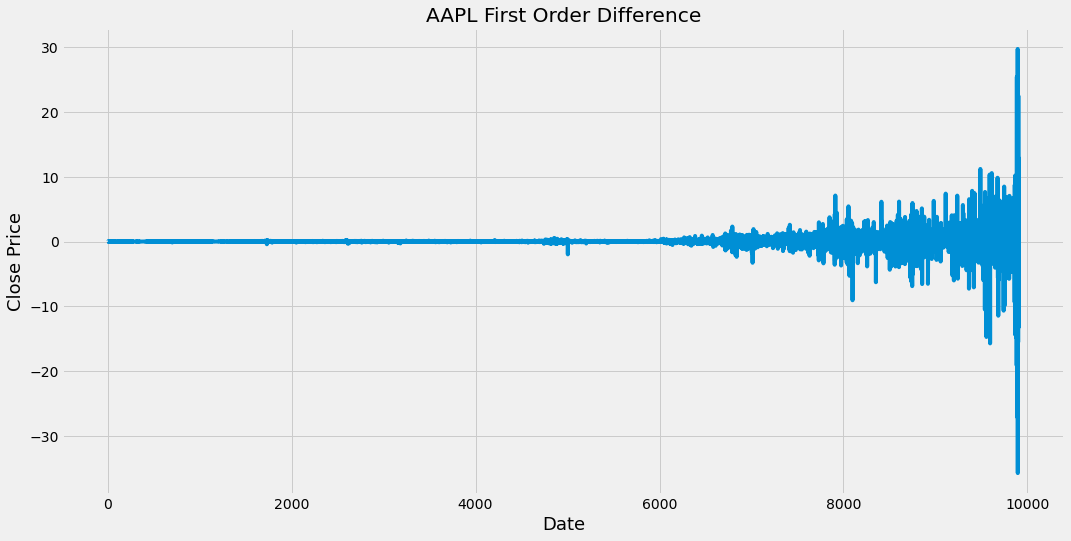

In [352]:
plt.figure(figsize=(16,8))
plt.plot(m)
plt.title(name+" First Order Difference")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

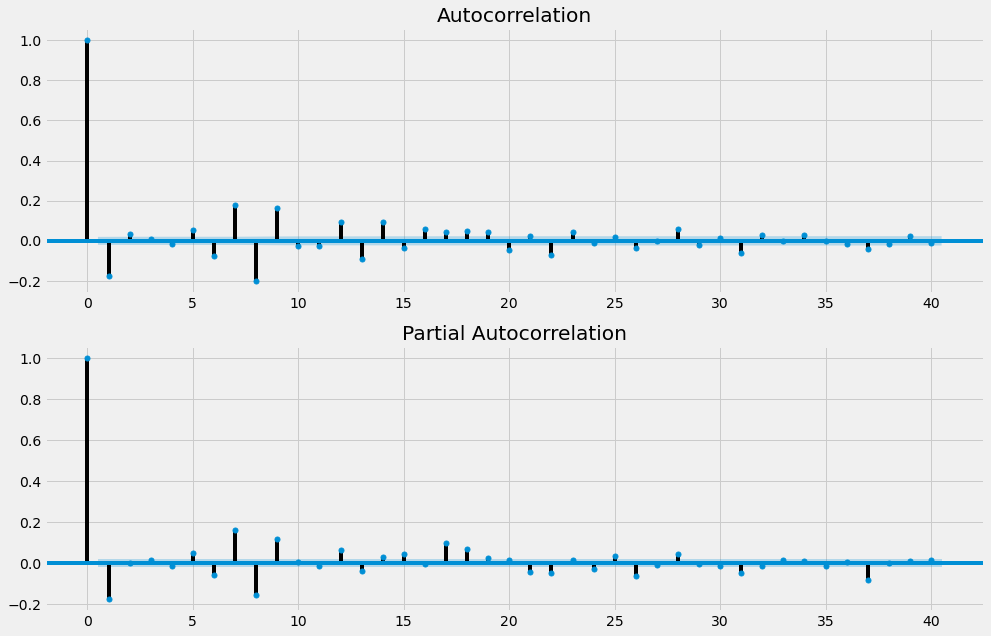

In [353]:
fig = plt.figure(figsize=(15,10))
axes1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(monthly_diff.iloc[1:],lags=40,ax=axes1)
axes2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(monthly_diff.iloc[1:],lags=40,ax=axes2)

In [369]:
#Resampling the Data to Monthly instead of Daily by Using Mean
m.index = pd.to_datetime(df.index)
Mean_Monthly = m.resample('M').mean()
Mean_Monthly

Date
1980-12-31     0.005323
1981-01-31    -0.004996
1981-02-28    -0.001645
1981-03-31    -0.001623
1981-04-30     0.003295
                ...    
2019-12-31     1.257143
2020-01-31     0.755239
2020-02-29    -1.902633
2020-03-31    -0.866818
2020-04-30   -13.379990
Freq: M, Name: Close, Length: 473, dtype: float64

In [370]:
column = ['High', 'Low', 'Open', 'Volume', 'Adj Close']

In [371]:
Mean_Monthly['2017':]

Date
2017-01-31     0.276500
2017-02-28     0.823158
2017-03-31     0.290000
2017-04-30    -0.000527
2017-05-31     0.414091
2017-06-30    -0.397272
2017-07-31     0.235500
2017-08-31     0.663913
2017-09-30    -0.494000
2017-10-31     0.678182
2017-11-30     0.133810
2017-12-31    -0.131001
2018-01-31    -0.085714
2018-02-28     0.562632
2018-03-31    -0.492381
2018-04-30    -0.120000
2018-05-31     0.982273
2018-06-30    -0.083809
2018-07-31     0.246666
2018-08-31     1.623479
2018-09-30    -0.099474
2018-10-31    -0.299131
2018-11-30    -1.918095
2018-12-31    -1.096842
2019-01-31     0.414286
2019-02-28     0.353157
2019-03-31     0.800000
2019-04-30     0.510476
2019-05-31    -1.163636
2019-06-30     1.142500
2019-07-31     0.687273
2019-08-31    -0.195454
2019-09-30     0.761500
2019-10-31     1.077826
2019-11-30     0.924500
2019-12-31     1.257143
2020-01-31     0.755239
2020-02-29    -1.902633
2020-03-31    -0.866818
2020-04-30   -13.379990
Freq: M, Name: Close, dtype: float6

<Figure size 1296x576 with 0 Axes>

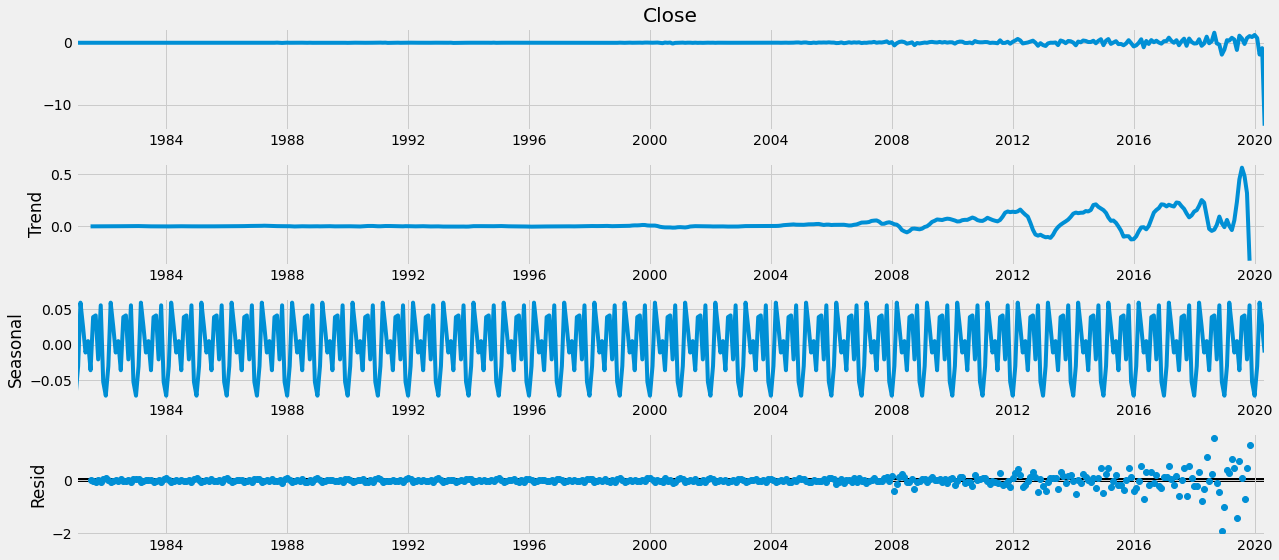

In [357]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomp = sm.tsa.seasonal_decompose(Mean_Monthly, model='additive')
fig = plt.figure() 
fig = decomp.plot()
plt.show()


## Time series forecasting

In [373]:
#using grid search in order to iteratively explore the different combinations of parameters
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
pdq_Seasonal = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_Seasonal[1]))
print('SARIMAX: {} x {}'.format(pdq[1], pdq_Seasonal[2]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_Seasonal[3]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_Seasonal[4]))

Examples of parameter combinations for Seasonal ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [374]:
l_Parameter = []
l_Parammeter_Seasonal=[]
AIC_l_results=[]
for param in pdq:
    for param_seasonal in pdq_Seasonal:
        try:
            model = sm.tsa.statespace.SARIMAX(Mean_Monthly,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = model.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            l_Parameter.append(param)
            l_Parammeter_Seasonal.append(param_seasonal)
            AIC_l_results.append(results.aic)
        except Exception as e:
            print(e)
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:962.23209169719
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:943.4766414379253
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1034.147279994645
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:954.2931950948428
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:938.6380317175723
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:938.8962005485503
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:951.5962075073254
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:926.7428133014471
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:954.6804155658456
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:939.3799177564599
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1007.8140862584785
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:945.7304213879269
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:938.4979837059016
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:938.3215680189285
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:953.5252507765158
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:927.0936750449471
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:955.319251264617
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:943.8111250342854
ARIMA(0, 1, 

In [375]:
minim=AIC_l_results[0]
for i in AIC_l_results[1:]:
    if i < minim: 
        minim = i
i=AIC_l_results.index(minim)
print(minim)
print(i)


865.9371280189097
63


In [376]:
model = sm.tsa.statespace.SARIMAX(train,
                                order=l_Parameter[i],
                                seasonal_order=l_Parammeter_Seasonal[i],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

res = model.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9387      0.045    -21.008      0.000      -1.026      -0.851
ma.L1          0.1578      0.074      2.144      0.032       0.014       0.302
ar.S.L12      -0.7818      0.148     -5.297      0.000      -1.071      -0.493
ma.S.L12      -0.6136      0.107     -5.754      0.000      -0.823      -0.405
sigma2         0.3943      0.009     43.572      0.000       0.377       0.412


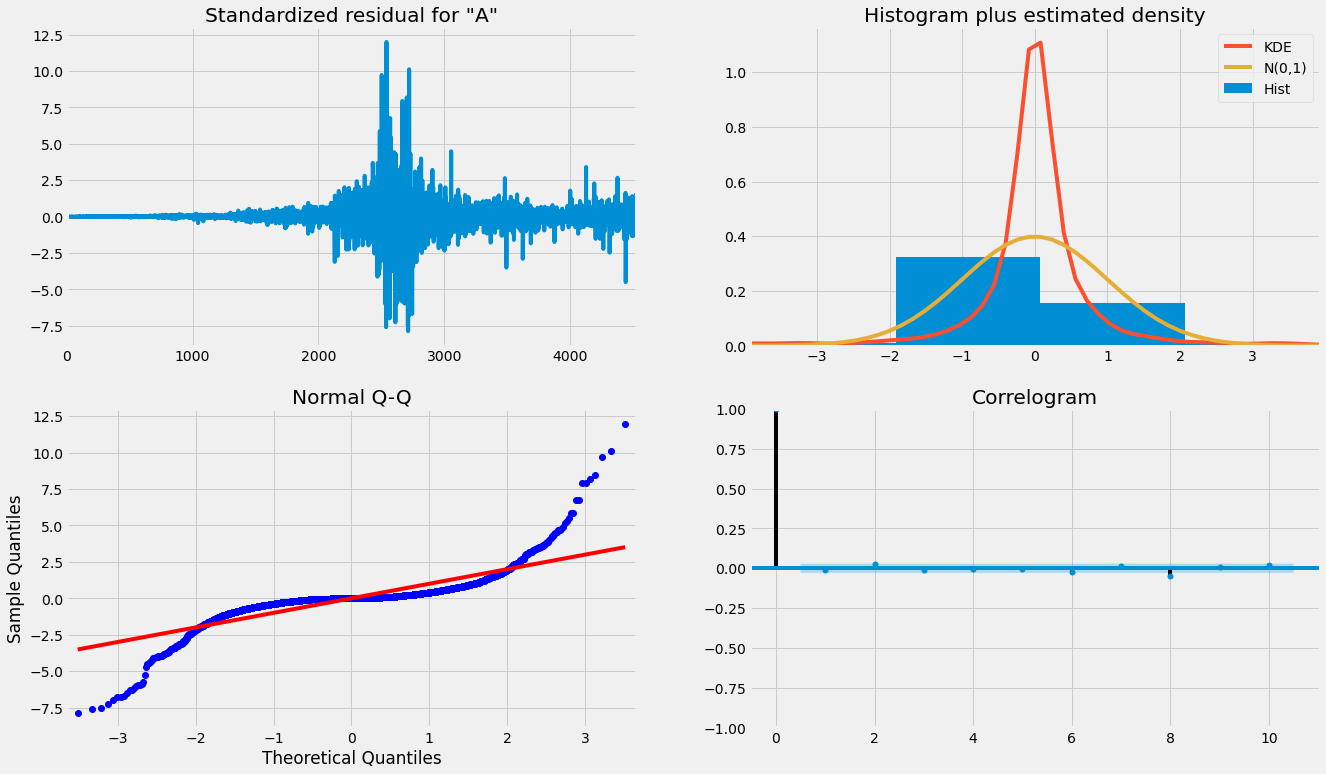

In [377]:
res.plot_diagnostics(figsize=(20, 12))
plt.show()

## Validating Predictions

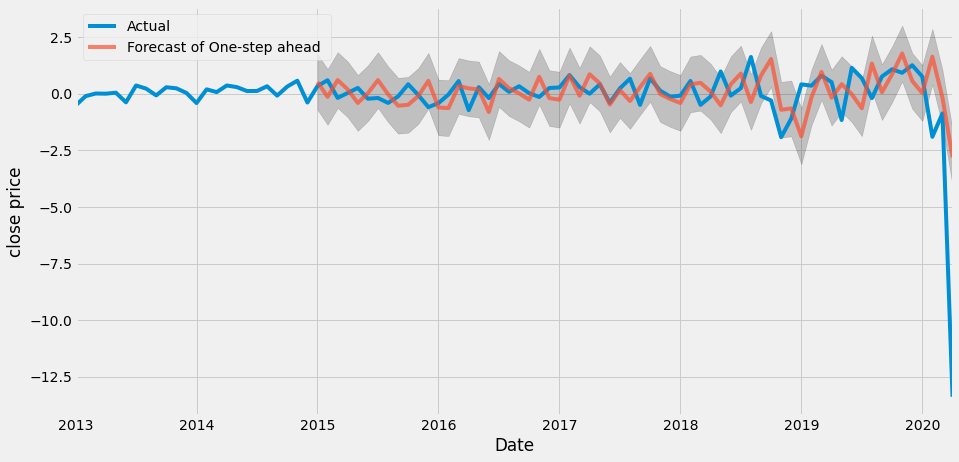

In [378]:
prediction = results.get_prediction(start=pd.to_datetime('2015-01-31'), dynamic=False)
pred_ci = prediction.conf_int()

axes = Mean_Monthly['2013':].plot(label='Actual')
prediction.predicted_mean.plot(ax=axes, label='Forecast of One-step ahead ', alpha=.7, figsize=(14, 7))

axes.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

axes.set_xlabel('Date')
axes.set_ylabel('close price')
plt.legend()

plt.show()

In [379]:
y_forecast = prediction.predicted_mean
y_true = Mean_Monthly['2016-01-31':]

# Compute the mean square error
mse = ((y_forecast - y_true) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 3.09


In [380]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 1.76


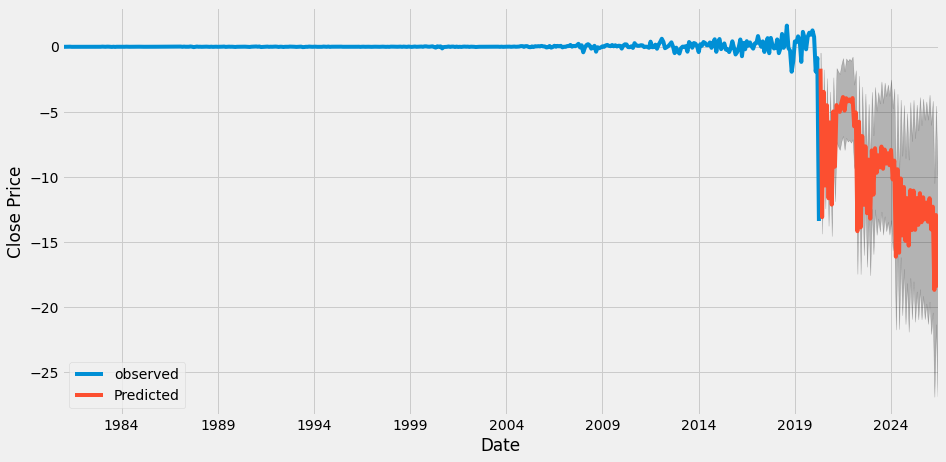

In [381]:
prediction_uc = results.get_forecast(steps=75)
prediction_ci = prediction_uc.conf_int()

axes = Mean_Monthly.plot(label='observed', figsize=(14, 7))
prediction_uc.predicted_mean.plot(ax=axes, label='Predicted')
axes.fill_between(prediction_ci.index,
                prediction_ci.iloc[:, 0],
                prediction_ci.iloc[:, 1], color='k', alpha=.25)
axes.set_xlabel('Date')
axes.set_ylabel('Close Price')

plt.legend()
plt.show()

# 3. LSTM

In [385]:
df_lstm = df
# Target column
target_AdjClose = pd.DataFrame(df_lstm['Adj Close'])
display(df_lstm.head())
print(df_lstm.shape)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


(9909, 6)


In [386]:
featureColumns = ['Open', 'High', 'Low', 'Volume']

### Normalizing Data

In [387]:
scaler = MinMaxScaler()
feature_minmax_TransfData = scaler.fit_transform(df_lstm[feature_columns])
feature_minmax_Transf = pd.DataFrame(columns=featureColumns, data=feature_minmax_TransfData, index=df_lstm.index)
feature_minmax_Transf.head()

,Open,High,Low,Volume
Date,,,,
1980-12-12,0.000970,0.000967,0.000981,0.063023
1980-12-15,0.000894,0.000886,0.000898,0.023516
1980-12-16,0.000784,0.000777,0.000787,0.014061
1980-12-17,0.000812,0.000811,0.000822,0.011462
1980-12-18,0.000853,0.000852,0.000863,0.009711


In [388]:
display(feature_minmax_Transf.head())
print('Shape of features : ', feature_minmax_Transf.shape)
print('Shape of target : ', target_AdjClose.shape)

splitRow1 = round(0.2 * df_lstm.shape[0])

target_AdjClose = target_AdjClose.shift(-1)
y_validation= target_AdjClose[-splitRow1:-1]
target_AdjClose = target_AdjClose[:-splitRow1]

X_validation = feature_minmax_Transf[-splitRow1:-1]
feature_minmax_Transf = feature_minmax_Transf[:-splitRow1]
display(X_validation.tail())
display(y_validation.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_Transf.shape)
print('Shape of target : ', target_AdjClose.shape)
display(target_AdjClose.tail())


,Open,High,Low,Volume
Date,,,,
1980-12-12,0.000970,0.000967,0.000981,0.063023
1980-12-15,0.000894,0.000886,0.000898,0.023516
1980-12-16,0.000784,0.000777,0.000787,0.014061
1980-12-17,0.000812,0.000811,0.000822,0.011462
1980-12-18,0.000853,0.000852,0.000863,0.009711


Shape of features :  (9909, 4)
Shape of target :  (9909, 1)


,Open,High,Low,Volume
Date,,,,
2020-03-25,0.772017,0.787579,0.755379,0.040728
2020-03-26,0.758983,0.788891,0.761754,0.033786
2020-03-27,0.778179,0.780315,0.763889,0.027334
2020-03-30,0.771986,0.779247,0.771161,0.022450
2020-03-31,0.786961,0.800520,0.779207,0.026362


,Adj Close
Date,
2020-03-25,258.440002
2020-03-26,247.740005
2020-03-27,254.809998
2020-03-30,254.289993
2020-03-31,240.910004



 -----After process------ 

Shape of features :  (7927, 4)
Shape of target :  (7927, 1)


,Adj Close
Date,
2012-05-09,70.747803
2012-05-10,70.275345
2012-05-11,69.222549
2012-05-14,68.596275
2012-05-15,67.717102


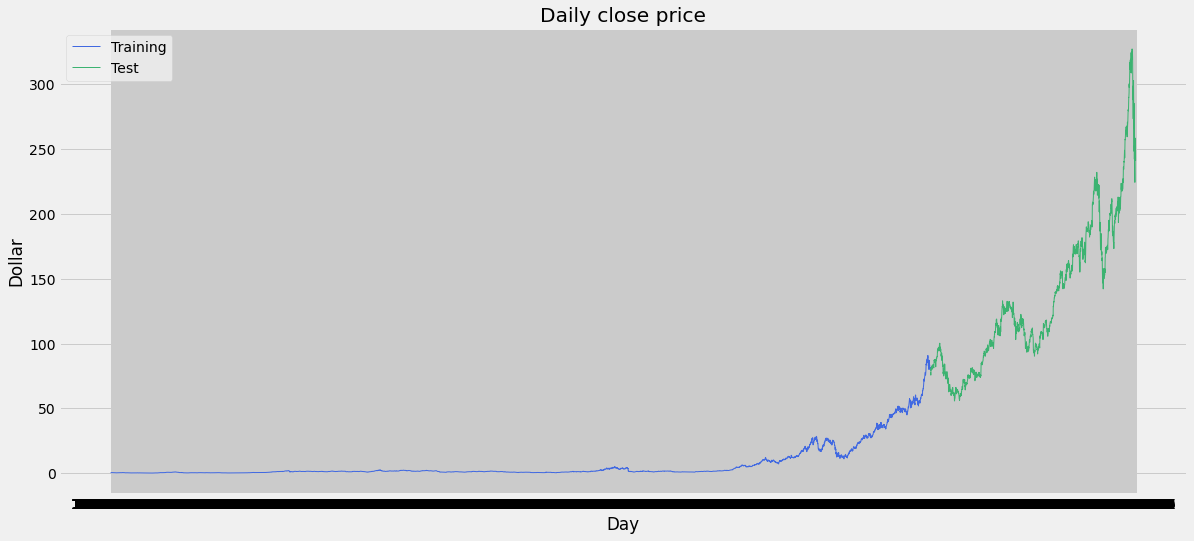

In [389]:
splitRow = round(0.8 * df_lstm.shape[0])
rawtrain = df_lstm.iloc[:splitRow]
rawtest = df_lstm.iloc[splitRow:]
plt.plot(rawtrain.index, rawtrain['Close'], color='royalblue', label='Training',linewidth=1)
plt.plot(rawtest.index, rawtest['Close'], color='mediumseagreen', label='Test',linewidth=1)
plt.legend(loc='upper left')
plt.title('Daily close price')
plt.xlabel('Day')
plt.ylabel('Dollar')
plt.show()

### Using TimeSeriesSplit for Train test Split

In [391]:
timeseries_split= TimeSeriesSplit(n_splits=10)
for train_i, test_i in timeseries_split.split(feature_minmax_Transf):
        X_train, X_test = feature_minmax_Transf[:len(train_i)], feature_minmax_Transf[len(train_i): (len(train_i)+len(test_i))]
        y_train, y_test = target_adj_close[:len(train_i)].values.ravel(), target_adj_close[len(train_i): (len(train_i)+len(test_i))].values.ravel()
        
        

In [392]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7207, 4)
(720, 4)
(7207,)
(720,)


In [393]:
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_p = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_p = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

### Training the Model

In [394]:
from keras import regularizers

In [ ]:
mod_lstm = Sequential()
mod_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
mod_lstm.add(Dense(1, kernel_regularizer=regularizers.l2(0.05)))

mod_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_mod_lstm = mod_lstm.fit(X_tr_p, y_train, epochs=200, batch_size=64, verbose=1, shuffle=False, callbacks=[early_stop])

Train on 7207 samples
Epoch 1/200
7207/7207 [==============================] - 2s 237us/sample - loss: 28.9327
Epoch 2/200
7207/7207 [==============================] - 0s 39us/sample - loss: 27.9737
Epoch 3/200
7207/7207 [==============================] - 0s 33us/sample - loss: 27.0404
Epoch 4/200
7207/7207 [==============================] - 0s 34us/sample - loss: 26.0056
Epoch 5/200
7207/7207 [==============================] - 0s 34us/sample - loss: 24.9202
Epoch 6/200
7207/7207 [==============================] - 0s 33us/sample - loss: 23.8611
Epoch 7/200
7207/7207 [==============================] - 0s 34us/sample - loss: 22.9016
Epoch 8/200
7207/7207 [==============================] - 0s 34us/sample - loss: 22.0886
Epoch 9/200
7207/7207 [==============================] - 0s 34us/sample - loss: 21.4356
Epoch 10/200
7207/7207 [==============================] - 0s 35us/sample - loss: 20.9291
Epoch 11/200
7207/7207 [==============================] - 0s 34us/sample - loss: 20.5419
Epoch 1

### Predictions made by LSTM

In [398]:
y_prediction_test_lstm = mod_lstm.predict(X_tst_p)
y_train_prediction_lstm = mod_lstm.predict(X_tr_p)
print("The R2 score on the Train set is:\t{:0.6f}".format(r2_score(y_train,y_train_prediction_lstm)))
r2_train = r2_score(y_train, y_train_prediction_lstm)

print("The R2 score on the Test set is:\t{:0.6f}".format(r2_score(y_test, y_prediction_test_lstm )))
r2_test = r2_score(y_test, y_prediction_test_lstm )



The R2 score on the Train set is:	0.981834
The R2 score on the Test set is:	0.617666


In [276]:
lstm_score= mod_lstm.evaluate(X_tst_p, y_test, batch_size=32)

720/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [277]:
print('LSTM: %f'%lstm_score)

LSTM: 13.674552


In [278]:
y_prediction_test_LSTM = mod_lstm.predict(X_tst_p)

### Visual from LSTM's Prediction

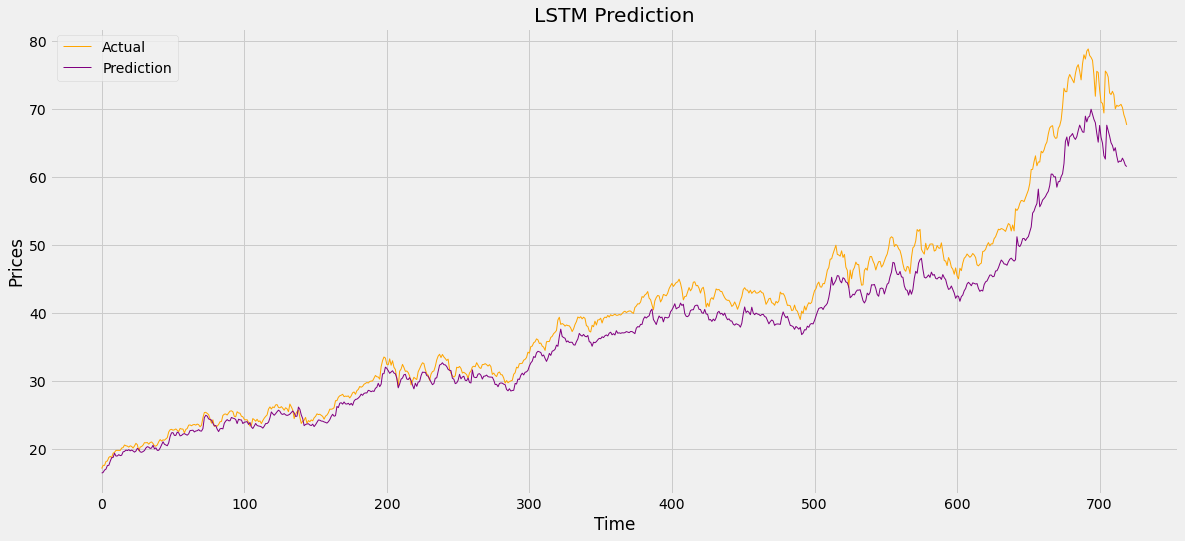

In [279]:
plt.plot(y_test, label='Actual',linewidth=1,color='orange')
plt.plot(y_prediction_test_LSTM, label='Prediction',linewidth=1,color='purple')
plt.title("LSTM Prediction")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

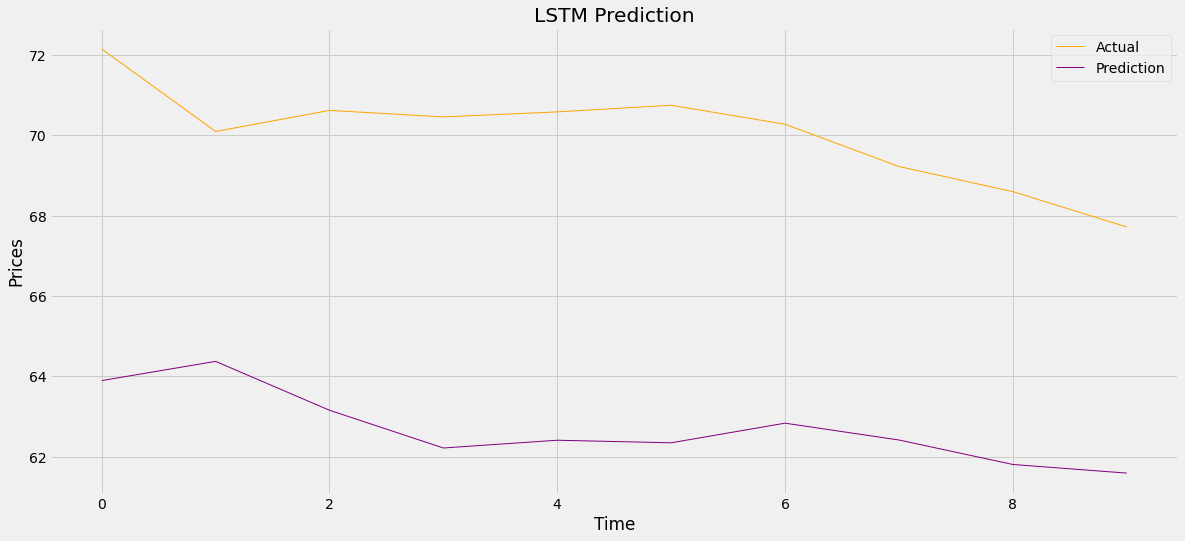

In [280]:
plt.plot(y_test[-10:], label='Actual',linewidth=1,color='orange')
plt.plot(y_prediction_test_LSTM[-10:], label='Prediction',linewidth=1,color='purple')
plt.title("LSTM Prediction")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [281]:
mse = mean_squared_error(y_test,y_prediction_test_LSTM)

rmse = math.sqrt(mse)

print("The Root Mean Square error of LSTM model is ",rmse)

3.586798472145487
